<a href="https://colab.research.google.com/github/mbk-dev/okama/blob/master/examples/03%20investment%20portfolios.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>

You can run the code examples in [Google Colab](https://colab.research.google.com/github/mbk-dev/okama/blob/master/examples/03%20investment%20portfolios.ipynb).

**To install the package:**

In [2]:
!pip install okama


[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


import okama and matplotlib packages ...

In [5]:
import warnings

import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [12.0, 6.0]
warnings.simplefilter(action="ignore", category=FutureWarning)

import okama as ok

**Portfolio** and **AssetList** can be helpful to learn about investment portfolio properties and to compare various portfolios with each other. With **AssetList** we can even compare portfolio with stocks, indexes and other types of financial assets (portfolio is just a special case of a financial asset).

In this tutorial we will learn how to: 

- Create investment portfolio and see its basic properties
- Rebalancing strategy and asset allocation
- Risk metrics of the portfolio
- Accumulated return, CAGR and dividend yield
- Compare several portfolios
- Forecast portfolios performance



### Create an investment portfolio

Portfolios are quite similar to AssetList, but we should specify **weights** and **rebalancing** strategy.

All the arguments have default values and can be skipped.

In [6]:
basic_portfolio = ok.Portfolio()
basic_portfolio

symbol                 portfolio_8431.PF
assets                          [SPY.US]
weights                            [1.0]
rebalancing_period                 month
currency                             USD
inflation                       USD.INFL
first_date                       1993-02
last_date                        2024-09
period_length         31 years, 8 months
dtype: object

Default ticker is 'SPY.US'.  
Default currency is 'USD'.  
Default rebalancing period is one month.  
Inflation is included by default: `inflation=True`  
If portfolio has several assets they are included with equal weights by default.

Let’s create Rick Ferri's Lazy Three Fund Portfolio (40/40/20).  
Rebalancing period should be one year.
```
Rebalancing is the process by which an investor restores their portfolio to its target allocation by selling and buying assets. After rebalancing all the assets have original weights.
```

**rebalancing_period** attribute can be: 'month', 'year', 'half-year', 'quarter' or 'none' (for not rebalanced portfolios).

In [7]:
rf3 = ok.Portfolio(
    ["BND.US", "VTI.US", "VXUS.US"],
    weights=[0.40, 0.40, 0.20],
    rebalancing_strategy="year",
)
rf3

symbol                        portfolio_7391.PF
assets                [BND.US, VTI.US, VXUS.US]
weights                         [0.4, 0.4, 0.2]
rebalancing_period                         year
currency                                    USD
inflation                              USD.INFL
first_date                              2011-02
last_date                               2024-09
period_length                13 years, 8 months
dtype: object

Available history date range is defined by the assets.  
Each asset has it **first_date** and **last_date** which can be shown by `.assets_first_dates` and `.assets_last_dates`

In [8]:
rf3.assets_first_dates

{'USD': Timestamp('1913-02-01 00:00:00'),
 'VTI.US': Timestamp('2001-06-01 00:00:00'),
 'BND.US': Timestamp('2007-05-01 00:00:00'),
 'VXUS.US': Timestamp('2011-02-01 00:00:00'),
 'USD.INFL': Timestamp('1913-02-01 00:00:00')}

In [9]:
rf3.newest_asset

'VXUS.US'

Here VXUS.US is a **stock with the shortest history** which is limiting the whole portfolio data.

In [10]:
rf3.assets_last_dates

{'BND.US': Timestamp('2024-10-01 00:00:00'),
 'VTI.US': Timestamp('2024-10-01 00:00:00'),
 'VXUS.US': Timestamp('2024-10-01 00:00:00'),
 'USD': Timestamp('2099-12-01 00:00:00'),
 'USD.INFL': Timestamp('2024-09-01 00:00:00')}

On the other hand, the **inflation** is limiting the data from the left side. If you need last month’s data to be included `inflation=False` should be used in Portfolio instantiating.

The ticker of portfolio is set automaticaly: **portfolio_8291.PF** (index is a random number).  
If you need a custom portfolio ticker you can use `symbol=` in portfolio instantiating or set it afterwards:

In [11]:
rf3.symbol = "RF3_portfolio.PF"  # 'PF' namespace is reserved for portfolios.

Wealth index (Cumulative Wealth Index) is a time series that presents the value of portfolio over historical time period. The initial investment is 1000 points in a base currency.

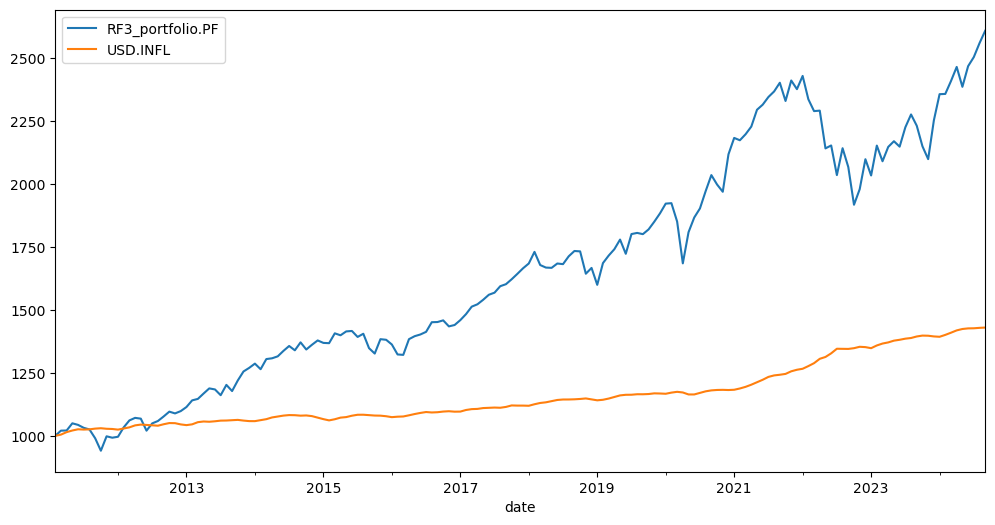

In [12]:
rf3.wealth_index.plot();

### Rebalancing strategy and asset allocaction

Table with original asset allocation can be seen with `.table`:

In [13]:
rf3.table

,asset name,ticker,weights
0,Vanguard Total Bond Market Index Fund ETF Shares,BND.US,0.4
1,Vanguard Total Stock Market Index Fund ETF Shares,VTI.US,0.4
2,Vanguard Total International Stock Index Fund ...,VXUS.US,0.2


RF3_portfolio has one year rebalancing period hence weight are subjects to change.  
It is possible to see assets eights time series with `.weights_ts`:

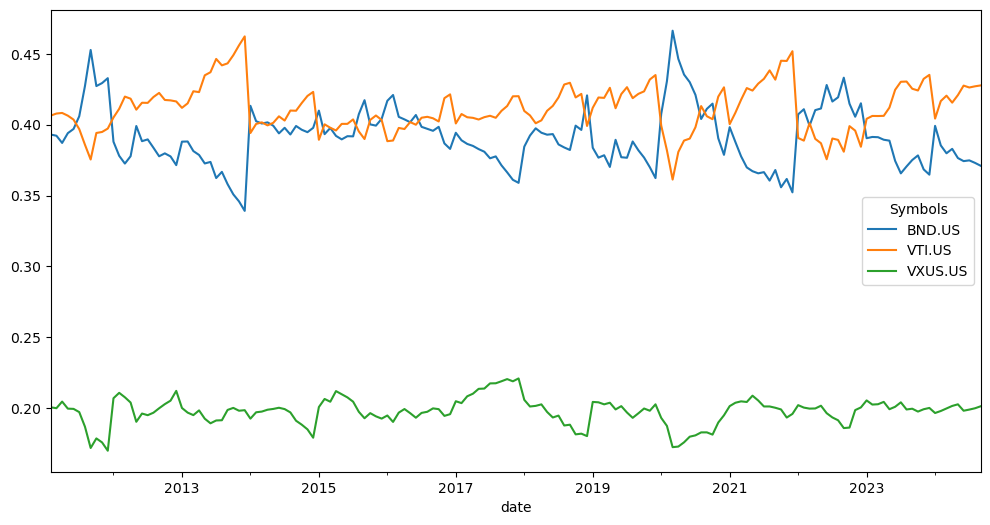

In [14]:
rf3.weights_ts.plot();

let's create the same Rick Ferry portfolio, but without rebalancing (asset allocation will change and never return to the original weights).

In [15]:
rf3_no_rebalancing = ok.Portfolio(
    ["BND.US", "VTI.US", "VXUS.US"],
    weights=[0.40, 0.40, 0.20],
    rebalancing_strategy="none",
)

Now it's easy to see how the weights get out of control over time... and we end up with portfolio overweight in stocks.

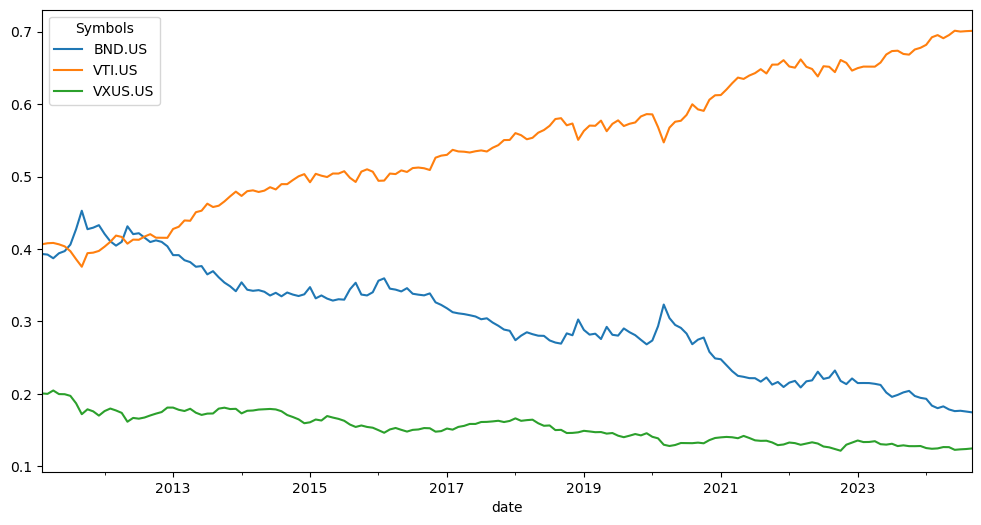

In [16]:
rf3_no_rebalancing.weights_ts.plot();

### Risk metrics of the portfolio

Portfolio has several methods to see risk metrics. By default with 'risk' we understand return time series standard deviation:

- risk_monthly (standard deviation for monthly rate of return time series)
- risk_annual (annualized standart deviation)
- semideviation_monthly (downside risk for monthly rate of return time series)
- semideviation_annual (annualized semideviation)
- get_var_historic (historic Value at Risk for the portfolio)
- get_cvar_historic (historic Conditional Value at Risk for the portfolio)
- drawdowns (percent decline from a previous peak)
- recovery_period (the longest recovery period after drawdown for the portfolio assets value)

In [17]:
rf3.risk_annual  # aanualized value for standard deviation of return

date
2011-03    0.055066
2011-04    0.058604
2011-05    0.062633
2011-06    0.063377
2011-07    0.058458
             ...   
2024-05    0.101507
2024-06    0.101279
2024-07    0.101180
2024-08    0.101027
2024-09    0.100865
Freq: M, Name: RF3_portfolio.PF, Length: 163, dtype: float64

In [18]:
rf3.semideviation_annual  # annualized value for downside risk

np.float64(0.07643141769642071)

In [19]:
rf3.get_cvar_historic(time_frame=12, level=1)  # one year CVAR with confidence level 1%

np.float64(0.17793338953579424)

Drawdowns (the percent decline from a previous peak) are easy to plot ...

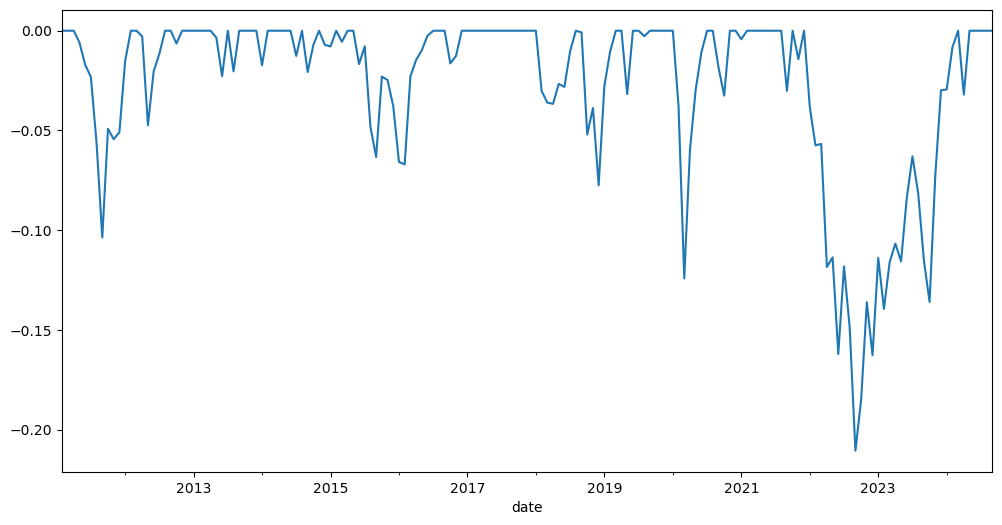

In [20]:
rf3.drawdowns.plot();

In [21]:
rf3.drawdowns.nsmallest(5)  # 5 Biggest drawdowns

date
2022-09   -0.210563
2022-10   -0.185137
2022-12   -0.162701
2022-06   -0.162101
2022-08   -0.148924
Freq: M, Name: RF3_portfolio.PF, dtype: float64

`reovery_period` highly related with Drawdowns. It shows the longest recovery periods for the portfolio value after drawdowns.

In [22]:
rf3.recovery_period.nlargest() / 12  # we want it in years

date
2024-03    2.166667
2016-07    1.083333
2012-02    0.750000
2018-08    0.500000
2019-03    0.500000
Freq: M, Name: RF3_portfolio.PF, dtype: float64

### Accumulated return, CAGR and dividend yield

Portfolio has several metrics to measure the profits and return:

- wealth_index (the value of portfolio over historical time period)
- wealth_index_with_assets (wealth index with assets values)
- mean_return_monthly (arithmetic mean for the portfolio rate of return)
- mean_return_annual (annualized value for monthly mean)
- annual_return_ts (Annual rate of return time series)
- get_cagr (Compound Annual Growth Rate for a given trailing period)
- get_rolling_cagr (rolling CAGR with)
- get_cumulative_return (cumulative return over a given trailing period)
- get_rolling_cumulative_return (rolling cumulative return)
- dividend_yield (portfolio LTM dividend yield monthly time series)

Wealth index is a simpliest time series showing portfolio value growth (we have already seen it here). Sometimes it's worth to compare portfolio value growth with assets values.  
For that mean there is `wealth_index_with_assets` method.

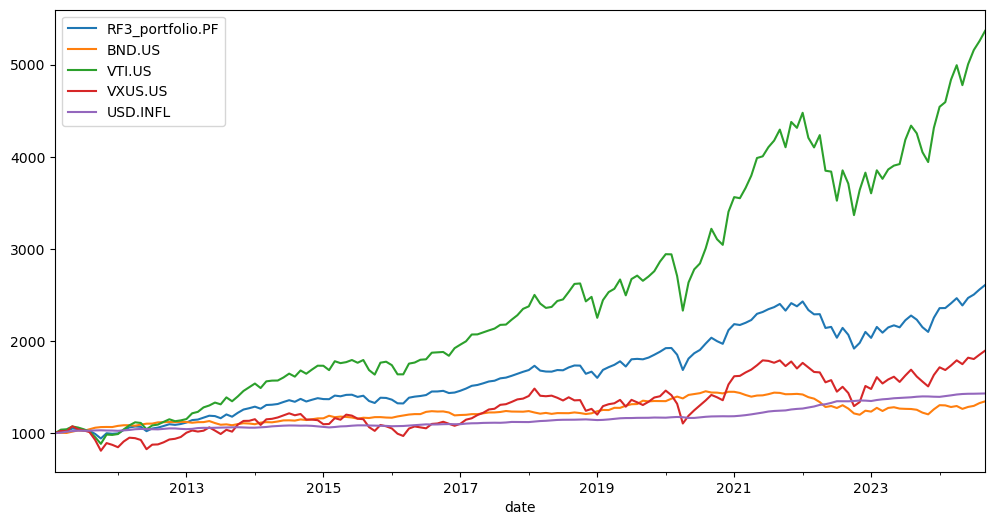

In [23]:
rf3.wealth_index_with_assets.plot();

Mean reaturn (arithmetic mean) for the portfolio is an annualized version of monthly mean:

In [24]:
rf3.mean_return_annual

np.float64(0.07866585599697729)

It's always good to see how portfolio perform on annual basis. Annual rate of return time series show portfolio return for each calendar year:

In [25]:
rf3.annual_return_ts

date
2011   -0.003654
2012    0.118505
2013    0.154623
2014    0.063946
2015   -0.004645
2016    0.070988
2017    0.154072
2018   -0.050306
2019    0.201576
2020    0.135694
2021    0.112768
2022   -0.162701
2023    0.158682
2024    0.127708
Freq: Y-DEC, Name: RF3_portfolio.PF, dtype: float64

... or in form of bar chart:

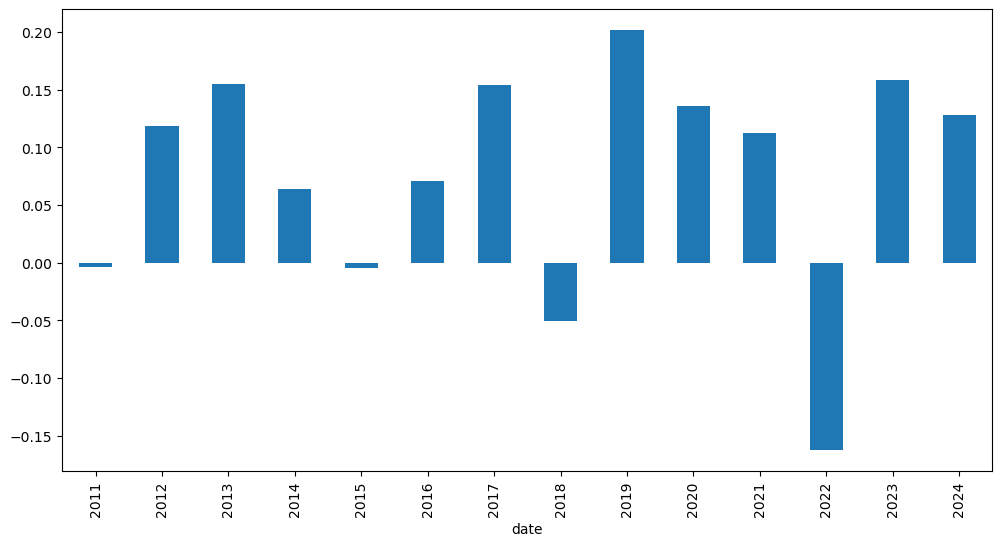

In [26]:
rf3.annual_return_ts.plot(kind="bar");

One of the most important return metrics is CAGR (Compound Annual Growth Rate). It can be seen for trailing periods (parameter *period* is in years):

In [27]:
rf3.get_cagr(period=5)  # portfolio is initiated with inflation=True. Hence, we see CAGR with mean inflation.

RF3_portfolio.PF    0.078680
USD.INFL            0.041976
dtype: float64

In [28]:
rf3.get_cagr(period=5, real=True)  # when real=True CAGR is adjusted for inflation (real CAGR)

RF3_portfolio.PF    0.035226
dtype: float64

Rolling CAGR for the portfolio is available with `get_rolling_cagr`:

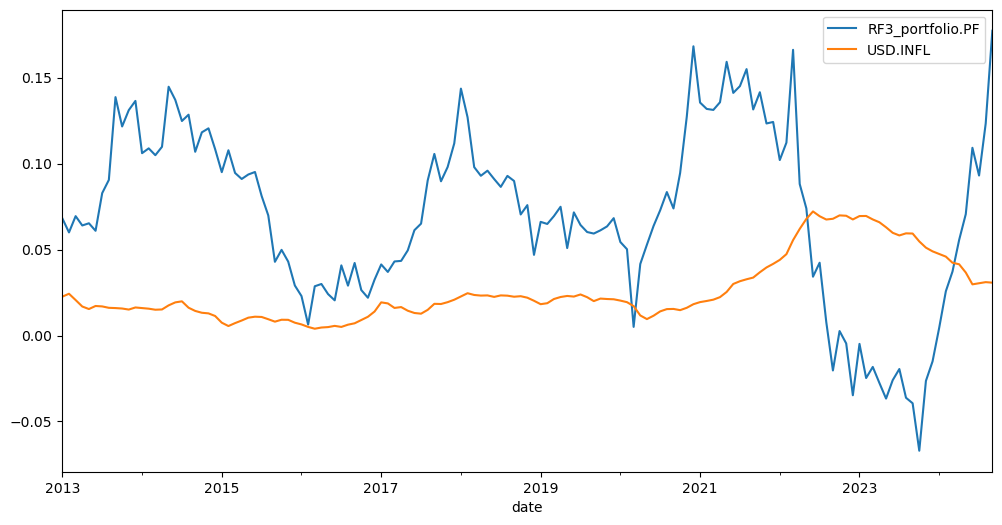

In [29]:
rf3.get_rolling_cagr(
    window=12 * 2
).plot();  # window size is in moths. We have rolling 2 year CAGR here and rolling 2 year mean inflation ...

Cumulative return over a given trailing period can be calculated with `get_cumulative_return`. Period argument can be in years or YTD (Year To Date).

In [30]:
rf3.get_cumulative_return(
    period="YTD"
)  # Return since the beginning of the current calendar year and the inflation for the same period

RF3_portfolio.PF    0.127708
USD.INFL            0.027916
dtype: float64

In [31]:
rf3.get_cumulative_return(period=5)  # Cumulative return for the 5 years period

RF3_portfolio.PF    0.460371
USD.INFL            0.228253
dtype: float64

Cumulative rolling return can be helpfull in the same situation as rolling CAGR:

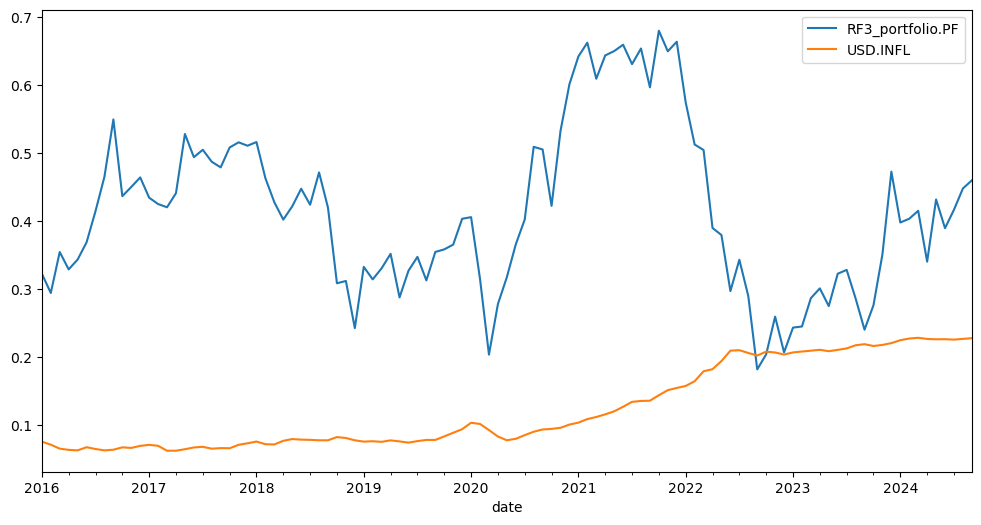

In [32]:
rf3.get_rolling_cumulative_return(window=12 * 5).plot();  # window size is in months (5 year cumulative return here)

Last twelve months (LTM) dividend yield is available with `dividend_yield` property.

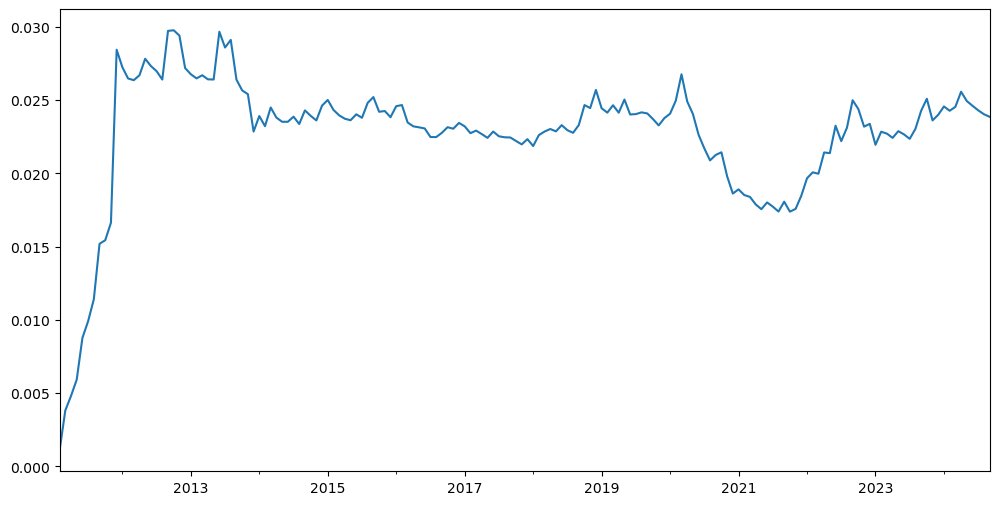

In [33]:
rf3.dividend_yield.plot();

Portfolio has monthly dividends time series:

In [34]:
rf3.dividends

2011-02     1.101142
2011-03     2.772640
2011-04     1.112450
2011-05     1.127169
2011-06     2.885499
             ...    
2024-05     2.680301
2024-06    10.481684
2024-07     2.817045
2024-08     2.874339
2024-09     8.545072
Freq: M, Name: RF3_portfolio.PF, Length: 164, dtype: float64

Calendar year dividends sum time series for the portfolio:

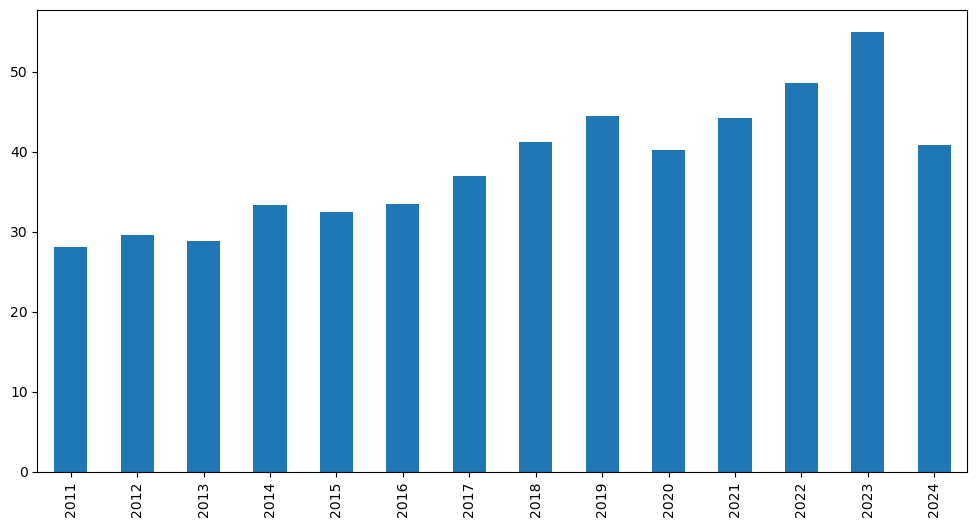

In [35]:
rf3.dividends.resample("Y").sum().plot(kind="bar");

 **Sharpe Ratio** was developed by Nobel laureate William F. Sharpe and is used to understand the return of an investment compared to its risk.

$$
S_p = \frac{R_p - R_f}{\sigma_p}
$$
$R_p$ - expected return of portfolio  
$R_f$ - risk-free rate of return  
$\sigma_p$ - portfolio risk (standard deviation of return)  

In [36]:
rf3.get_sharpe_ratio(rf_return=0.02)  # risk-free rate is 2% here

np.float64(0.5816251429887087)

Finally the easiest way to see the portfolio basic properties is with `describe`:

In [37]:
rf3.describe()

,property,period,RF3_portfolio.PF,inflation
0,compound return,YTD,0.127708,0.027916
1,CAGR,1 years,0.236297,0.024425
2,CAGR,5 years,0.07868,0.041976
3,CAGR,10 years,0.07064,0.028529
4,CAGR,"13 years, 8 months",0.07413,0.026631
5,Annualized mean return,"13 years, 8 months",0.078666,NaN
6,Dividend yield,LTM,0.023869,NaN
7,Risk,"13 years, 8 months",0.100865,NaN
8,CVAR,"13 years, 8 months",0.177933,NaN
9,Max drawdown,"13 years, 8 months",-0.210563,NaN


### Compare several portfolios

Portfolio is a kind of financial asset and can be included in AssetList to compare with other portfolios (assets or benchmarks).

Lets create  Rick Ferri 4 assets portfolio and compare the behaviour with 3 assets portfolio.  

In [38]:
assets = ["BND.US", "VTI.US", "VXUS.US", "VNQ.US"]  # Vanguard REIT ETF (VNQ) is added.
weights = [0.40, 0.30, 0.24, 0.06]

To compare properly with RF3 portfolio the same rebalancing period should be chosen:

In [39]:
rf4 = ok.Portfolio(
    assets=assets, weights=weights, rebalancing_strategy="year", symbol="RF4_portfolio.PF"
)  # we also give a custom name to portfolio with 'symbol' propety
rf4

symbol                                 RF4_portfolio.PF
assets                [BND.US, VTI.US, VXUS.US, VNQ.US]
weights                          [0.4, 0.3, 0.24, 0.06]
rebalancing_period                                 year
currency                                            USD
inflation                                      USD.INFL
first_date                                      2011-02
last_date                                       2024-09
period_length                        13 years, 8 months
dtype: object

Now we create an AssetList to compare RF3 with RF4 and add a benchamrk (SP 500 TR index).

In [40]:
ls = ok.AssetList(["SP500TR.INDX", rf3, rf4])
ls

assets           [SP500TR.INDX, RF3_portfolio.PF, RF4_portfolio...
currency                                                       USD
first_date                                                 2011-02
last_date                                                  2024-09
period_length                                   13 years, 8 months
inflation                                                 USD.INFL
dtype: object

Some behavior will be seen with `wealth_indexes`:

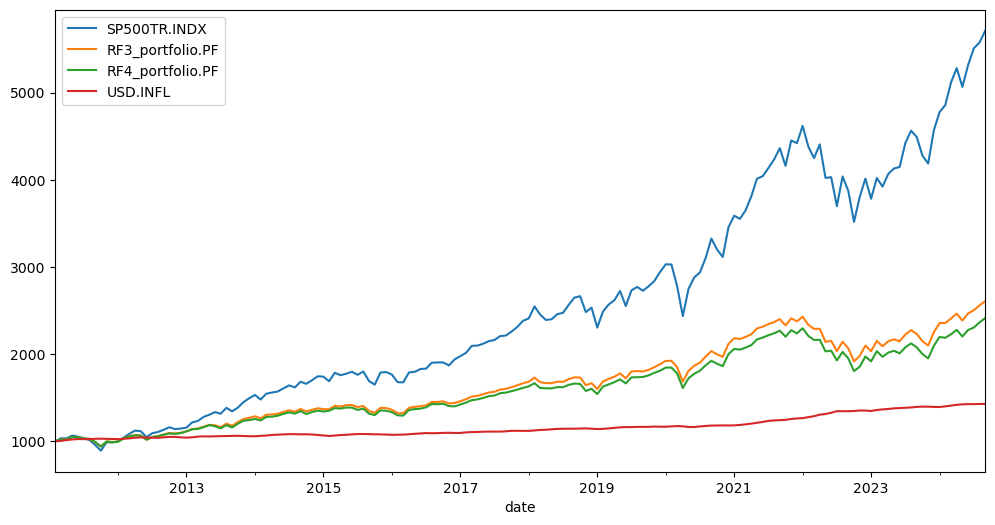

In [41]:
ls.wealth_indexes.plot();

It worth plotting the portfolios and benchmark on the risk / return chart with `plot_assets`.<br> 
**X-axis** is Risk (Standard Deviation)
**Y-axis** is Return (Mean return or CAGR)

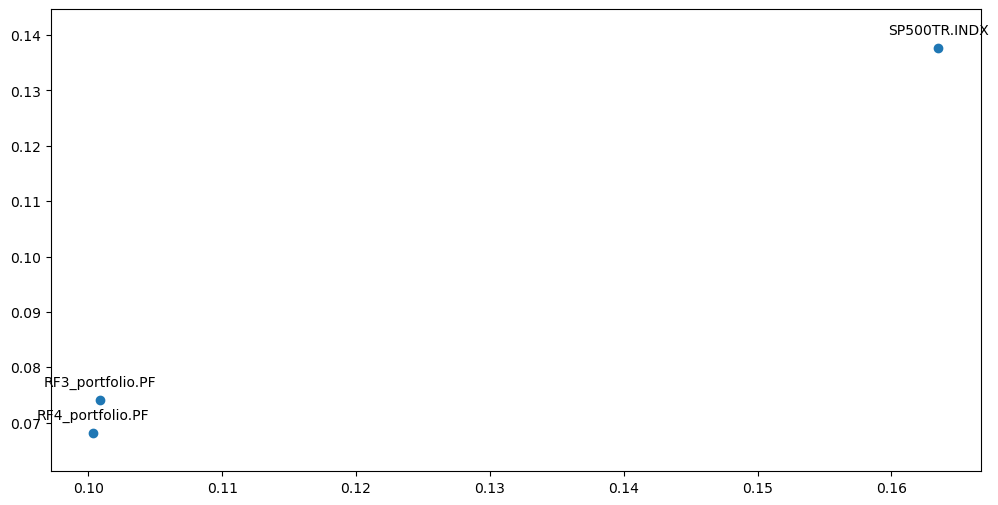

In [42]:
ls.plot_assets(kind="cagr");  # we chouse CAGR (geomtric mean of return) as Y-axis by setting kind='cagr'

**See [04 efficient frontier single period.ipynb](https://github.com/mbk-dev/okama/blob/master/examples/04%20efficient%20frontier%20single%20period.ipynb) and [05 efficient frontier multi-period.ipynb](https://github.com/mbk-dev/okama/blob/master/examples/05%20efficient%20frontier%20multi-period.ipynb) to plot portfolios with the Efficient Frontier.**

Given risk-free rate it's easy to compare **Sharpe Ratios** of the portfolios and match it with the benchmark with `get_sharpe_ratio`:

In [43]:
ls.get_sharpe_ratio(rf_return=0.02)  # Risk-Free rate is 2% here

Symbols
SP500TR.INDX        0.790574
RF3_portfolio.PF    0.583263
RF4_portfolio.PF    0.526439
dtype: float64

Most important information can be seen for trailing periods with `describe` method.  
It shows "descriptive statistics":  

- YTD (Year To date) compound return
- CAGR for a given list of periods and full available period
- Annualized mean rate of return (arithmetic mean)
- LTM Dividend yield - last twelve months dividend yield

Risk metrics (full period):

- risk (standard deviation)
- CVAR (timeframe is 1 year)
- max drawdowns (and dates of the drawdowns)

In [44]:
ls.describe([1, 5, 8])  # portfolio CAGR is shown for YTD, 1, 5, 8 years and for the full histrical period.

,property,period,SP500TR.INDX,RF3_portfolio.PF,RF4_portfolio.PF,inflation
0,Compound return,YTD,0.221048,0.127708,0.120632,0.027916
1,CAGR,1 years,0.363773,0.236297,0.23087,0.024425
2,CAGR,5 years,0.159875,0.07868,0.069856,0.041976
3,CAGR,8 years,0.150125,0.077875,0.070192,0.033956
4,CAGR,"13 years, 8 months",0.137719,0.07413,0.068148,0.026631
5,Annualized mean return,"13 years, 8 months",0.149273,0.078831,0.072828,NaN
6,Dividend yield,LTM,0.0,0.023248,0.025393,NaN
7,Risk,"13 years, 8 months",0.163518,0.100865,0.100349,NaN
8,CVAR,"13 years, 8 months",0.167821,0.177933,0.181797,NaN
9,Max drawdowns,"13 years, 8 months",-0.238631,-0.210563,-0.213989,NaN


### Forecast portfolios performance

Forecasting methods are described in a dedicated notebook [07 forecasting.ipynb](https://github.com/mbk-dev/okama/blob/master/examples/07%20forecasting.ipynb).